In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/city_day.csv')
df['Datetime'] = pd.to_Datetime(df['Datetime'])

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        18265 non-null  object        
 1   Datetime    18265 non-null  datetime64[ns]
 2   PM2.5       18265 non-null  float64       
 3   PM10        18265 non-null  float64       
 4   NO          18265 non-null  float64       
 5   NO2         18265 non-null  float64       
 6   NOx         18265 non-null  float64       
 7   NH3         18265 non-null  float64       
 8   CO          18265 non-null  float64       
 9   SO2         18265 non-null  float64       
 10  O3          18265 non-null  float64       
 11  Benzene     18265 non-null  float64       
 12  Toluene     18265 non-null  float64       
 13  Xylene      18265 non-null  float64       
 14  AQI         18265 non-null  float64       
 15  AQI_Bucket  18265 non-null  object        
dtypes: datetime64[ns](1), 

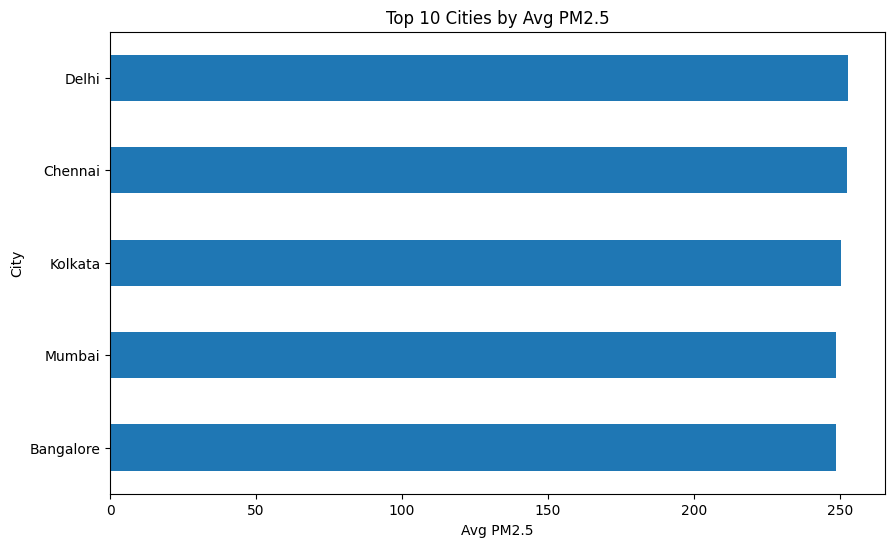

In [5]:
top_cities = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(10)
top_cities.plot(kind='barh', figsize=(10,6), title='Top 10 Cities by Avg PM2.5')
plt.xlabel('Avg PM2.5')
plt.gca().invert_yaxis()
plt.show()


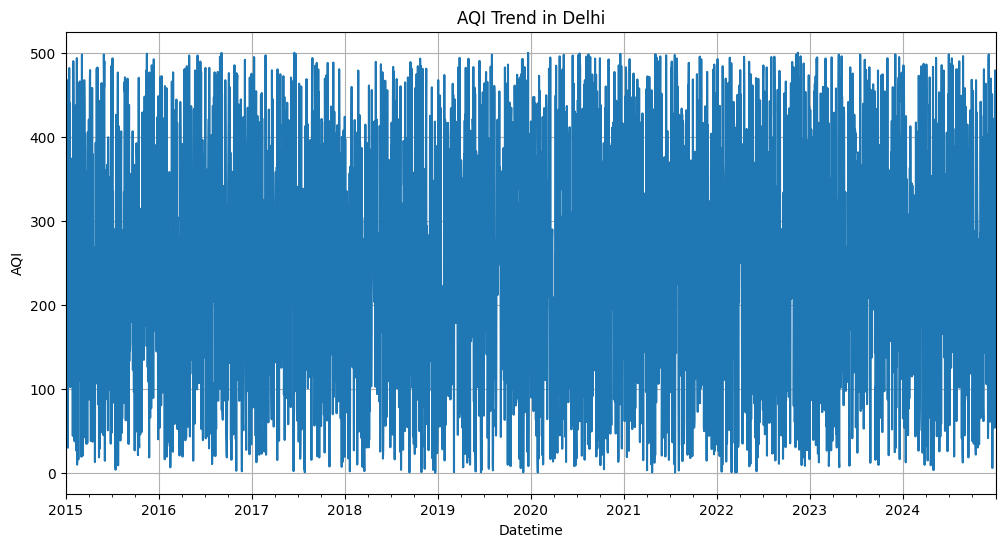

In [7]:
delhi = df[df['City'] == 'Delhi']
delhi.set_index('Datetime')['AQI'].plot(figsize=(12,6), title='AQI Trend in Delhi')
plt.ylabel('AQI')
plt.grid()
plt.show()


<Axes: title={'center': 'Most Polluted Cities (Avg PM2.5) - 2023'}, xlabel='City'>

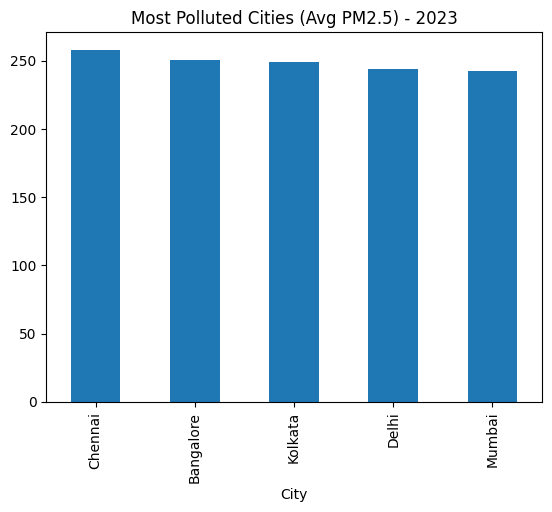

In [9]:

df_2023 = df[df['Datetime'].dt.year == 2023]
top_cities = df_2023.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(5)
top_cities.plot(kind='bar', title='Most Polluted Cities (Avg PM2.5) - 2023')


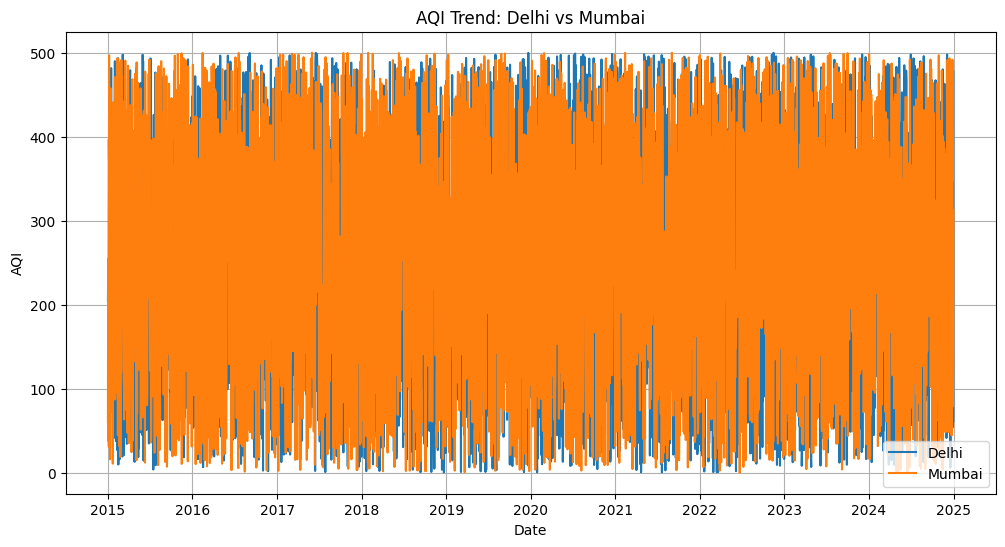

In [10]:
delhi = df[df['City'] == 'Delhi']
mumbai = df[df['City'] == 'Mumbai']

plt.figure(figsize=(12,6))
plt.plot(delhi['Datetime'], delhi['AQI'], label='Delhi')
plt.plot(mumbai['Datetime'], mumbai['AQI'], label='Mumbai')
plt.title('AQI Trend: Delhi vs Mumbai')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid()
plt.show()


Text(0.5, 1.0, 'Pollutant Correlation Heatmap')

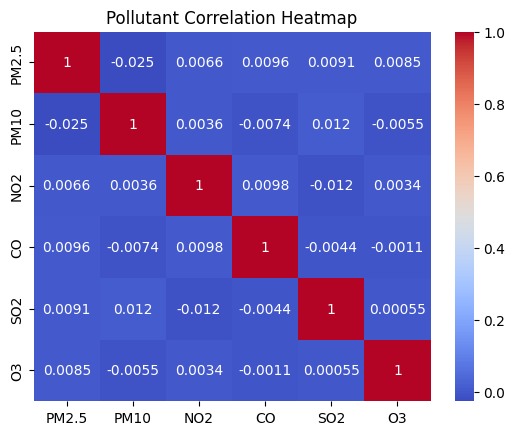

In [11]:
pollutants = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]
sns.heatmap(pollutants.corr(), annot=True, cmap='coolwarm')
plt.title('Pollutant Correlation Heatmap')


<Axes: title={'center': 'Monthly Avg AQI - All Cities'}, xlabel='Month'>

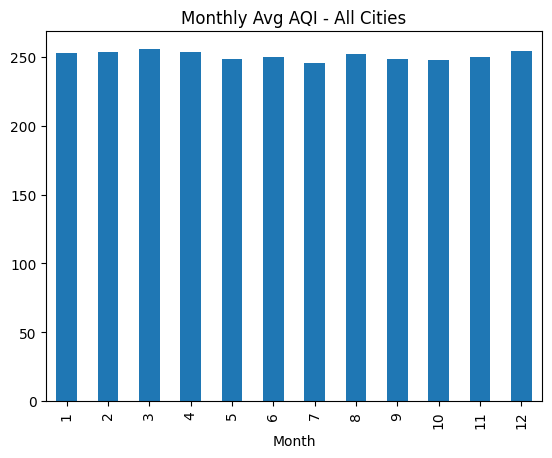

In [13]:
df['Month'] = df['Datetime'].dt.month
monthly_avg = df.groupby('Month')['AQI'].mean()
monthly_avg.plot(kind='bar', title='Monthly Avg AQI - All Cities')
